In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor

df = pd.read_csv('WellnessMeasure.csv')
df["Training_load_f1"] = np.random.normal(5,2,5011) + np.random.uniform(0,1,5011)
df["Training_load_f2"] = np.random.normal(5,1,5011)
df["Performance"] = np.random.normal(2,0.5,5011)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 10 columns):
Date                5011 non-null object
PlayerID            5011 non-null int64
MonitoringScore     5011 non-null int64
Energy              5011 non-null float64
Nourishment         5011 non-null float64
Discomfort          5011 non-null float64
Determination       5011 non-null float64
Training_load_f1    5011 non-null float64
Training_load_f2    5011 non-null float64
Performance         5011 non-null float64
dtypes: float64(7), int64(2), object(1)
memory usage: 391.6+ KB


In [15]:
df = df[df.columns.difference(["Date","PlayerID"])]
y = df["Performance"]
X = df[df.columns.difference(["Performance"])]
X.head()

,Determination,Discomfort,Energy,MonitoringScore,Nourishment,Training_load_f1,Training_load_f2
0,5.102797,1.985388,9.559896,13,3.501880,6.862328,4.769693
1,7.796001,1.142109,12.702699,19,3.698991,10.469057,4.332932
2,10.350426,2.500879,11.972553,19,4.232901,2.734421,4.234884
3,9.512673,2.167529,8.645920,15,3.802447,3.775594,4.057900
4,10.583512,2.508064,12.738104,20,3.489422,6.152570,4.348555


## XGBoost

In [16]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=511)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.4, learning_rate = 0.1, subsample = 0.75, \
                          max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
var = explained_variance_score(preds,y_test)

print("RMSE: %f" % (rmse))
print("Explained variance: %f" % (var))

RMSE: 0.722269
Explained variance: -809.678055


C:\Users\sangh\Miniconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\sangh\Miniconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


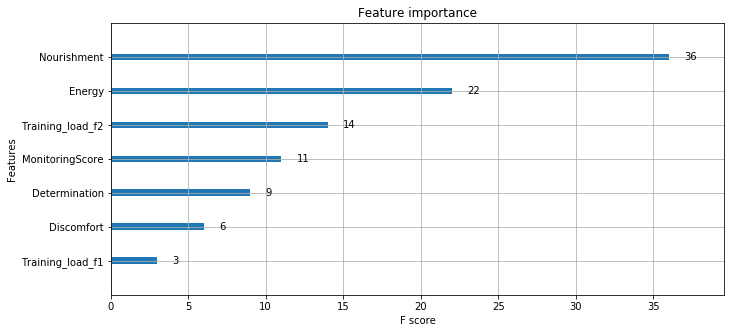

In [17]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [11, 5]
plt.show()

## Linear Regression

In [18]:
import statsmodels.formula.api as smf
model = smf.ols("Performance ~ MonitoringScore + Energy + Nourishment + Discomfort + Determination + Training_load_f1 + Training_load_f2", \
                data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3001
Date:                Tue, 19 Nov 2019   Prob (F-statistic):              0.954
Time:                        23:36:43   Log-Likelihood:                -3686.9
No. Observations:                5011   AIC:                             7390.
Df Residuals:                    5003   BIC:                             7442.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.9855      0.069  

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, r2_score
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
y_pred_train = regr.predict(X_train)

print("Test Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Train Mean squared error: %.2f" % mean_squared_error(y_train,y_pred_train))
print("R^2 score: %.2f" % r2_score(y_test, y_pred))
print("Explained variance: %.2f" % explained_variance_score(y_test,y_pred))

Test Mean squared error: 0.26
Train Mean squared error: 0.25
R^2 score: -0.00
Explained variance: -0.00
